# 서울시 편의점 매출 결정요인 분석
## 03. 시각화

---

### 이 노트북의 목표
EDA에서 확인한 패턴을 시각적으로 검증하고, 발표/보고서용 차트 생성

### 시각화 구성
1. 변수 분포 확인 (히스토그램)
2. H1 검증: 유동인구 vs 매출 (산점도)
3. H2 검증: 점포수 vs 매출 (산점도)
4. H3 검증: 상권유형별 매출 (박스플롯)
5. 상관관계 요약 (히트맵)
6. 시계열 추이 (라인차트)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)

# 저장 경로
import os
os.makedirs('./outputs', exist_ok=True)

# 데이터 로드
df = pd.read_csv('./분석데이터.csv', encoding='utf-8-sig')
print(f"데이터 로드: {len(df):,}건")

데이터 로드: 6,097건


## 1. 변수 분포 확인

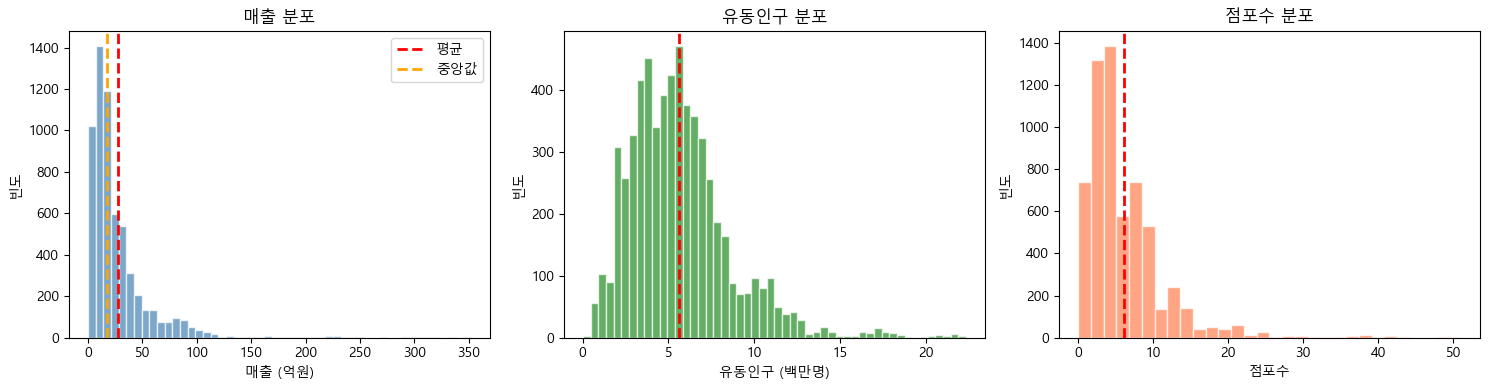

→ 모든 변수가 오른쪽 꼬리 분포 (양의 왜도)
→ 평균 > 중앙값: 고매출/고유동인구 지역이 평균을 끌어올림


In [2]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 매출 분포
axes[0].hist(df['당월_매출_금액']/1e8, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(df['당월_매출_금액'].mean()/1e8, color='red', linestyle='--', linewidth=2, label='평균')
axes[0].axvline(df['당월_매출_금액'].median()/1e8, color='orange', linestyle='--', linewidth=2, label='중앙값')
axes[0].set_xlabel('매출 (억원)')
axes[0].set_ylabel('빈도')
axes[0].set_title('매출 분포')
axes[0].legend()

# 유동인구 분포
axes[1].hist(df['총_유동인구_수']/1e6, bins=50, color='forestgreen', edgecolor='white', alpha=0.7)
axes[1].axvline(df['총_유동인구_수'].mean()/1e6, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('유동인구 (백만명)')
axes[1].set_ylabel('빈도')
axes[1].set_title('유동인구 분포')

# 점포수 분포
axes[2].hist(df['점포_수'], bins=30, color='coral', edgecolor='white', alpha=0.7)
axes[2].axvline(df['점포_수'].mean(), color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('점포수')
axes[2].set_ylabel('빈도')
axes[2].set_title('점포수 분포')

plt.tight_layout()
plt.savefig('./outputs/01_변수분포.png', dpi=150, bbox_inches='tight')
plt.show()

print("→ 모든 변수가 오른쪽 꼬리 분포 (양의 왜도)")
print("→ 평균 > 중앙값: 고매출/고유동인구 지역이 평균을 끌어올림")

## 2. H1 검증: 유동인구 → 매출

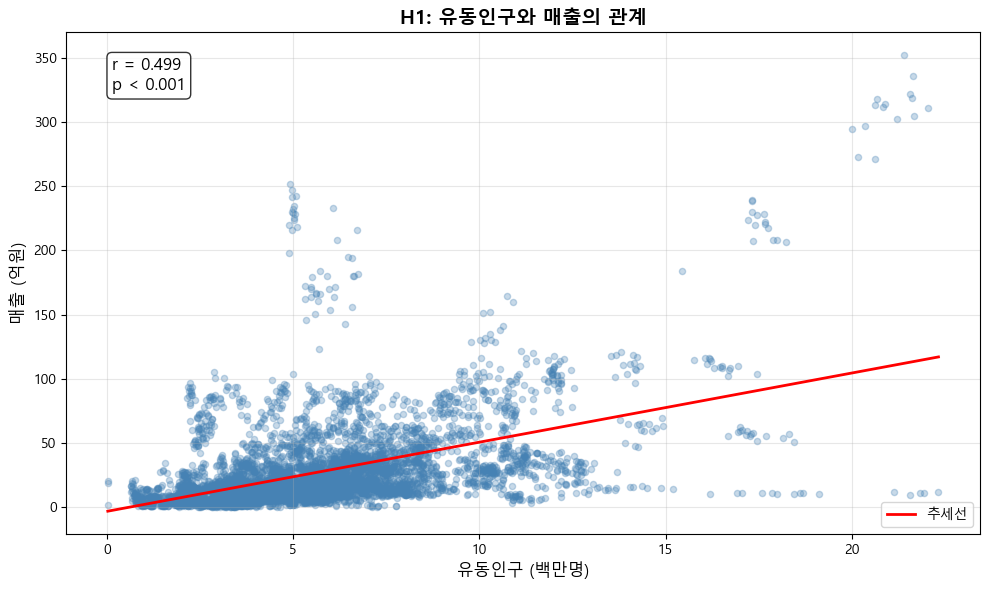

→ 상관계수 r = 0.499: 유동인구가 많을수록 매출이 높아지는 경향
→ H1 지지: 양의 상관관계 확인


In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

# 산점도
ax.scatter(df['총_유동인구_수']/1e6, df['당월_매출_금액']/1e8, 
           alpha=0.3, s=20, color='steelblue')

# 추세선
z = np.polyfit(df['총_유동인구_수'], df['당월_매출_금액'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['총_유동인구_수'].min(), df['총_유동인구_수'].max(), 100)
ax.plot(x_line/1e6, p(x_line)/1e8, color='red', linewidth=2, label='추세선')

# 상관계수 표시
corr, pval = stats.pearsonr(df['총_유동인구_수'], df['당월_매출_금액'])
ax.text(0.05, 0.95, f'r = {corr:.3f}\np < 0.001', transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlabel('유동인구 (백만명)', fontsize=12)
ax.set_ylabel('매출 (억원)', fontsize=12)
ax.set_title('H1: 유동인구와 매출의 관계', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('./outputs/02_H1_유동인구_매출.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"→ 상관계수 r = {corr:.3f}: 유동인구가 많을수록 매출이 높아지는 경향")
print(f"→ H1 지지: 양의 상관관계 확인")

## 3. H2 검증: 점포수 → 매출

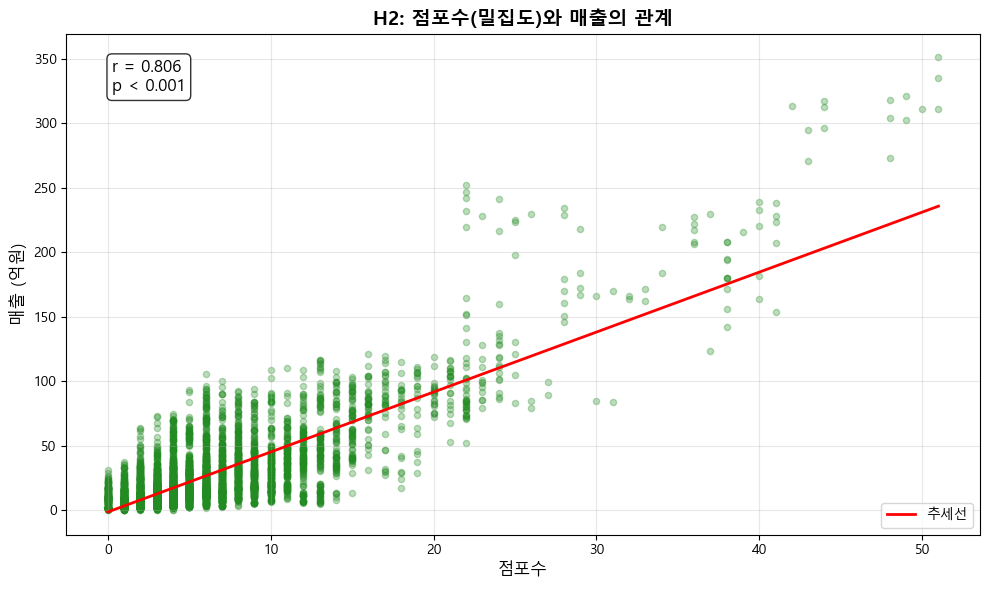

→ 상관계수 r = 0.806: 점포수가 많을수록 매출이 높음
→ H2 지지: 강한 양의 상관관계
→ 주의: 역인과 가능성 (매출 높은 지역에 점포가 많이 생김)


In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

# 산점도
ax.scatter(df['점포_수'], df['당월_매출_금액']/1e8, 
           alpha=0.3, s=20, color='forestgreen')

# 추세선
z = np.polyfit(df['점포_수'], df['당월_매출_금액'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['점포_수'].min(), df['점포_수'].max(), 100)
ax.plot(x_line, p(x_line)/1e8, color='red', linewidth=2, label='추세선')

# 상관계수 표시
corr, pval = stats.pearsonr(df['점포_수'], df['당월_매출_금액'])
ax.text(0.05, 0.95, f'r = {corr:.3f}\np < 0.001', transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlabel('점포수', fontsize=12)
ax.set_ylabel('매출 (억원)', fontsize=12)
ax.set_title('H2: 점포수(밀집도)와 매출의 관계', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('./outputs/03_H2_점포수_매출.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"→ 상관계수 r = {corr:.3f}: 점포수가 많을수록 매출이 높음")
print(f"→ H2 지지: 강한 양의 상관관계")
print(f"→ 주의: 역인과 가능성 (매출 높은 지역에 점포가 많이 생김)")

## 4. H3 검증: 상권유형별 매출

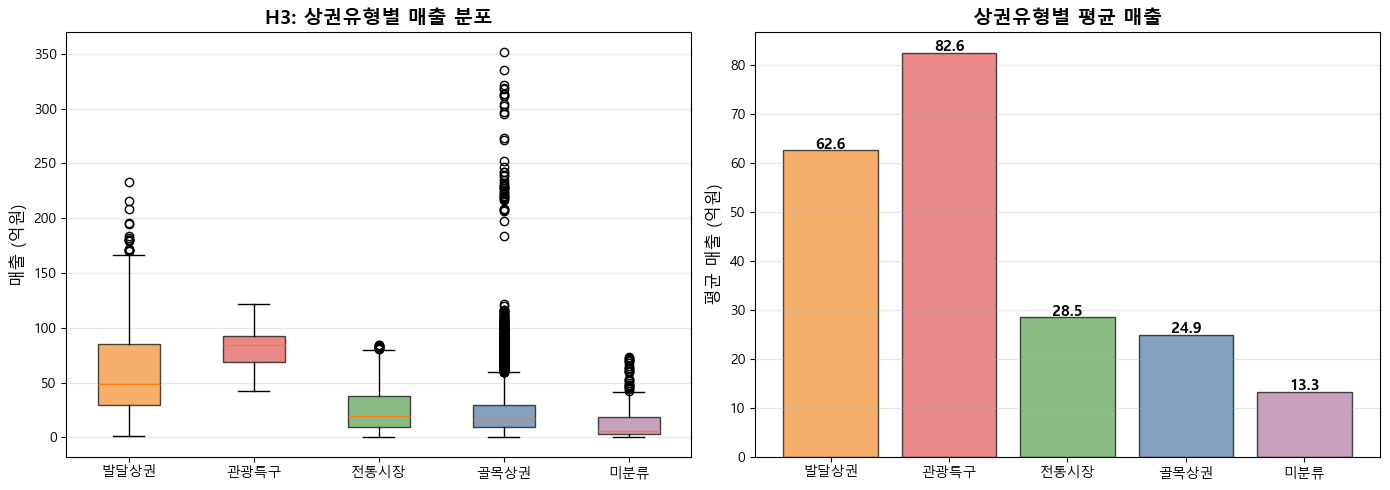

→ 발달상권 > 관광특구 > 전통시장 > 골목상권 > 미분류 순으로 매출 높음
→ H3 지지: 상권유형별 매출 차이 뚜렷


In [5]:
# 상권유형 순서 및 색상
type_order = ['발달상권', '관광특구', '전통시장', '골목상권', '미분류']
colors = {'발달상권': '#F28E2B', '관광특구': '#E15759', '전통시장': '#59A14F', 
          '골목상권': '#4E79A7', '미분류': '#B07AA1'}

# 존재하는 상권유형만 필터링
type_order = [t for t in type_order if t in df['주요_상권유형'].values]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 박스플롯
box_data = [df[df['주요_상권유형']==t]['당월_매출_금액']/1e8 for t in type_order]
bp = axes[0].boxplot(box_data, labels=type_order, patch_artist=True)
for patch, t in zip(bp['boxes'], type_order):
    patch.set_facecolor(colors[t])
    patch.set_alpha(0.7)
axes[0].set_ylabel('매출 (억원)', fontsize=12)
axes[0].set_title('H3: 상권유형별 매출 분포', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 평균 막대그래프
type_means = df.groupby('주요_상권유형')['당월_매출_금액'].mean().reindex(type_order) / 1e8
bars = axes[1].bar(type_order, type_means.values, color=[colors[t] for t in type_order], alpha=0.7, edgecolor='black')
for bar, val in zip(bars, type_means.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
                 f'{val:.1f}', ha='center', fontsize=11, fontweight='bold')
axes[1].set_ylabel('평균 매출 (억원)', fontsize=12)
axes[1].set_title('상권유형별 평균 매출', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('./outputs/04_H3_상권유형_매출.png', dpi=150, bbox_inches='tight')
plt.show()

print("→ 발달상권 > 관광특구 > 전통시장 > 골목상권 > 미분류 순으로 매출 높음")
print("→ H3 지지: 상권유형별 매출 차이 뚜렷")

## 5. 상관관계 요약 (히트맵)

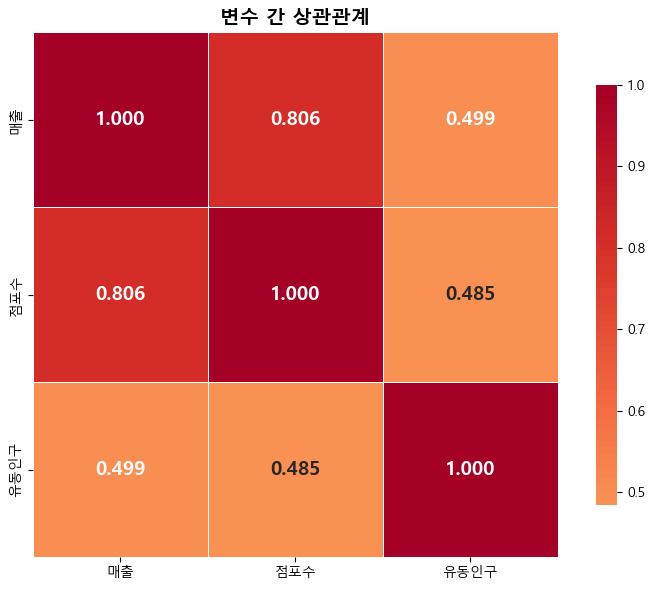

→ 점포수-매출: 강한 상관 (r > 0.8)
→ 유동인구-매출: 중간 상관 (r ≈ 0.5)
→ 점포수-유동인구: 중간 상관 → 다중공선성 VIF 확인 필요


In [6]:
# 상관행렬 계산
corr_vars = ['당월_매출_금액', '점포_수', '총_유동인구_수']
corr_matrix = df[corr_vars].corr()
corr_matrix.index = ['매출', '점포수', '유동인구']
corr_matrix.columns = ['매출', '점포수', '유동인구']

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, annot_kws={'size': 14, 'weight': 'bold'},
            cbar_kws={'shrink': 0.8}, ax=ax)
ax.set_title('변수 간 상관관계', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./outputs/05_상관관계_히트맵.png', dpi=150, bbox_inches='tight')
plt.show()

print("→ 점포수-매출: 강한 상관 (r > 0.8)")
print("→ 유동인구-매출: 중간 상관 (r ≈ 0.5)")
print("→ 점포수-유동인구: 중간 상관 → 다중공선성 VIF 확인 필요")

## 6. 시계열 추이

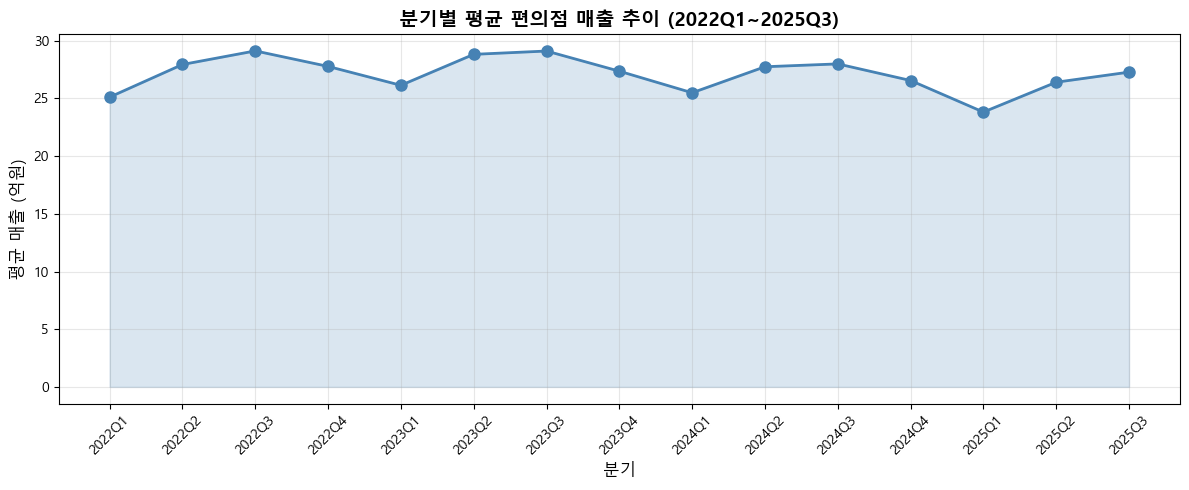

In [7]:
# 분기별 평균 매출 추이
quarterly = df.groupby('기준_년분기_코드')['당월_매출_금액'].mean() / 1e8
labels = [f"{q//10}Q{q%10}" for q in quarterly.index]

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(labels, quarterly.values, marker='o', linewidth=2, markersize=8, color='steelblue')
ax.fill_between(range(len(labels)), quarterly.values, alpha=0.2, color='steelblue')

ax.set_xlabel('분기', fontsize=12)
ax.set_ylabel('평균 매출 (억원)', fontsize=12)
ax.set_title('분기별 평균 편의점 매출 추이 (2022Q1~2025Q3)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('./outputs/06_분기별_매출추이.png', dpi=150, bbox_inches='tight')
plt.show()

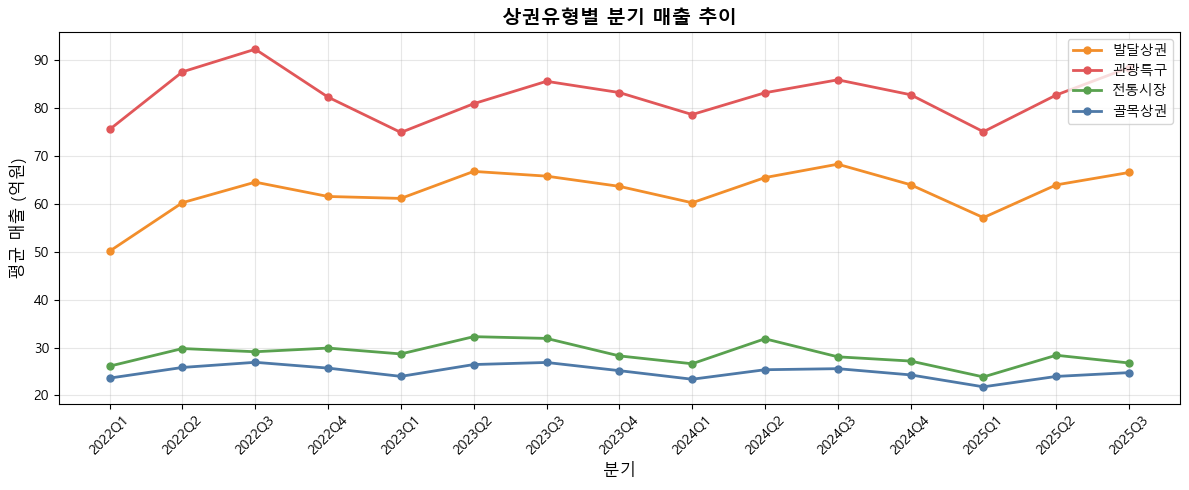

→ 상권유형별 매출 격차가 시간에 따라 유지됨
→ 발달상권이 지속적으로 가장 높은 매출


In [8]:
# 상권유형별 추이
fig, ax = plt.subplots(figsize=(12, 5))

for t in ['발달상권', '관광특구', '전통시장', '골목상권']:
    subset = df[df['주요_상권유형'] == t]
    if len(subset) > 0:
        quarterly_t = subset.groupby('기준_년분기_코드')['당월_매출_금액'].mean() / 1e8
        labels_t = [f"{q//10}Q{q%10}" for q in quarterly_t.index]
        ax.plot(labels_t, quarterly_t.values, marker='o', linewidth=2, markersize=5, 
                label=t, color=colors[t])

ax.set_xlabel('분기', fontsize=12)
ax.set_ylabel('평균 매출 (억원)', fontsize=12)
ax.set_title('상권유형별 분기 매출 추이', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('./outputs/07_상권유형별_추이.png', dpi=150, bbox_inches='tight')
plt.show()

print("→ 상권유형별 매출 격차가 시간에 따라 유지됨")
print("→ 발달상권이 지속적으로 가장 높은 매출")

---
## 시각화 요약

In [9]:
print("=" * 60)
print("시각화 결과 요약")
print("=" * 60)

print("""
[H1: 유동인구 → 매출]
  시각적 확인: 양의 선형 관계
  → 유동인구 많을수록 매출 증가

[H2: 점포수 → 매출]
  시각적 확인: 강한 양의 선형 관계
  → 점포수 많을수록 매출 높음 (역인과 가능성 주의)

[H3: 상권유형 → 매출]
  시각적 확인: 그룹 간 뚜렷한 차이
  → 발달상권 > 관광특구 > 전통시장 > 골목상권

[추가 발견]
  - 점포수와 유동인구 간 상관 존재 → VIF 확인 필요
  - 상권유형별 격차는 시간에 따라 유지

저장된 파일:
  ./outputs/01_변수분포.png
  ./outputs/02_H1_유동인구_매출.png
  ./outputs/03_H2_점포수_매출.png
  ./outputs/04_H3_상권유형_매출.png
  ./outputs/05_상관관계_히트맵.png
  ./outputs/06_분기별_매출추이.png
  ./outputs/07_상권유형별_추이.png

다음 단계: 04_회귀분석.ipynb에서 통계적 검증 수행
""")

시각화 결과 요약

[H1: 유동인구 → 매출]
  시각적 확인: 양의 선형 관계
  → 유동인구 많을수록 매출 증가

[H2: 점포수 → 매출]
  시각적 확인: 강한 양의 선형 관계
  → 점포수 많을수록 매출 높음 (역인과 가능성 주의)

[H3: 상권유형 → 매출]
  시각적 확인: 그룹 간 뚜렷한 차이
  → 발달상권 > 관광특구 > 전통시장 > 골목상권

[추가 발견]
  - 점포수와 유동인구 간 상관 존재 → VIF 확인 필요
  - 상권유형별 격차는 시간에 따라 유지

저장된 파일:
  ./outputs/01_변수분포.png
  ./outputs/02_H1_유동인구_매출.png
  ./outputs/03_H2_점포수_매출.png
  ./outputs/04_H3_상권유형_매출.png
  ./outputs/05_상관관계_히트맵.png
  ./outputs/06_분기별_매출추이.png
  ./outputs/07_상권유형별_추이.png

다음 단계: 04_회귀분석.ipynb에서 통계적 검증 수행

